# Plant Disesase Detection

### 1. Loading the Data

In [4]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [5]:
data_dir = 'data'
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32 

In [6]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2, 
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

Found 5702 files belonging to 3 classes.
Using 4562 files for training.


In [7]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)


Found 5702 files belonging to 3 classes.
Using 1140 files for validation.


In [8]:
class_names = train_dataset.class_names
print(f"The classes are: {class_names}")

The classes are: ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


### 2. Visualizing Sample Images

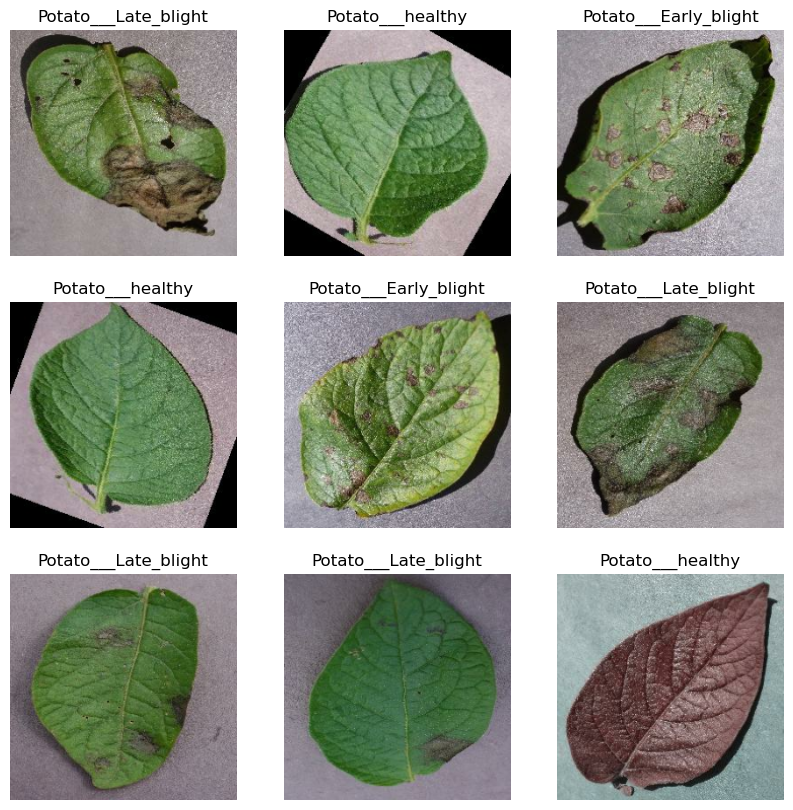

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

Class 'Potato___Early_blight': 1939 images
Class 'Potato___healthy': 1824 images
Class 'Potato___Late_blight': 1939 images


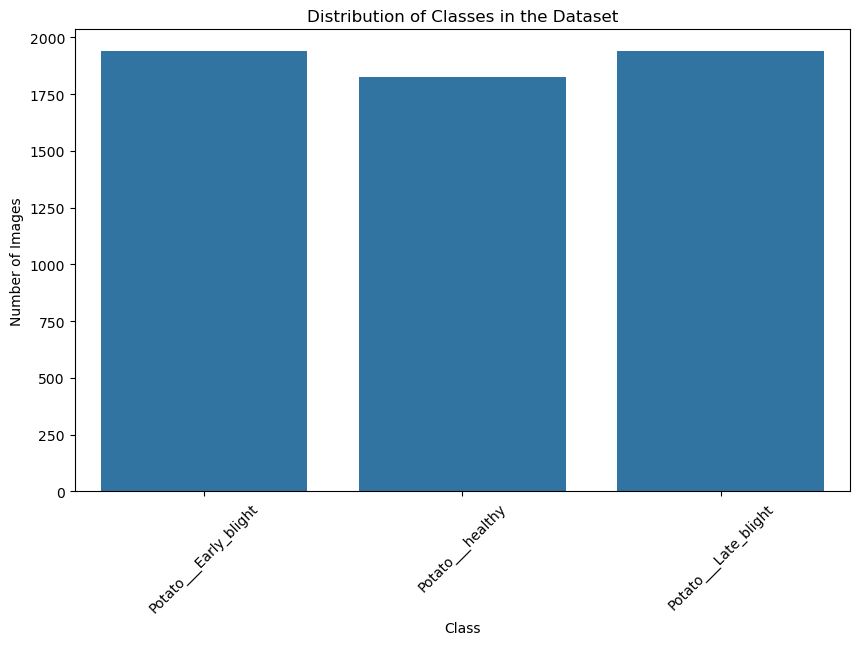

In [11]:
import seaborn as sns

# Create empty lists to store counts and class names
image_counts = []
class_labels = []

# Loop through each folder in the data directory
for class_folder in os.listdir(data_dir):
    if os.path.isdir(os.path.join(data_dir, class_folder)):
        count = len(os.listdir(os.path.join(data_dir, class_folder)))
        image_counts.append(count)
        class_labels.append(class_folder)
        print(f"Class '{class_folder}': {count} images")

# Create a bar chart to visualize the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=class_labels, y=image_counts)
plt.title('Distribution of Classes in the Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

### Summary
* The dataset consists of three classes: Potato___Early_blight, Potato___healthy,Potato___Late_blight

* The images have been resized to 224x224 pixels.

* The class distribution is balanced, with approximately 1900 images per class

* The data is now split into training and validation sets and is ready for model training in Week 2.